In [18]:
pip install requests

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [26]:
import requests
import base64
from IPython.display import Image, display

In [41]:
host = 'http://localhost:8080/api/v1'
observation = requests.post(f'{host}/observe/init')
print(observation.json())
obs_id = observation.json()['observation_id']
print(obs_id)

{'observation_id': '6e399b0f-614e-4882-95b7-1298759e970f', 'status': 'Initialised Observation Session'}
6e399b0f-614e-4882-95b7-1298759e970f


In [44]:
select_array_response = requests.post(f'{host}/observe/select/{obs_id}/array', json={
    'array_config': 'VLA_A',
    'hour_angle_start': -6.0,
    'hour_angle_end': 6.0,
    'sample_rate': 300
})
array_added = select_array_response.json()
print(array_added)

{'array_config': 'VLA_A', 'hour_angle_end': 6.0, 'hour_angle_start': -6.0, 'sample_rate': 300, 'status': 'array added'}


In [47]:
select_array_response = requests.post(f'{host}/observe/select/{obs_id}/array', json={
    'array_config': 'ATCA_6D',
    'hour_angle_start': -6.0,
    'hour_angle_end': 6.0,
    'sample_rate': 300
})
array_added = select_array_response.json()
print(array_added)

{'array_config': 'ATCA_6D', 'hour_angle_end': 6.0, 'hour_angle_start': -6.0, 'sample_rate': 300, 'status': 'array added'}


In [48]:
select_obs_options_response = requests.post(f'{host}/observe/select/{obs_id}/options', json={
    'freq': 1500.0,
    'src_declination': 20.0
})
options = select_obs_options_response.json()
options

{'freq': 1500.0, 'src_declination': 20.0, 'status': 'parameters added'}

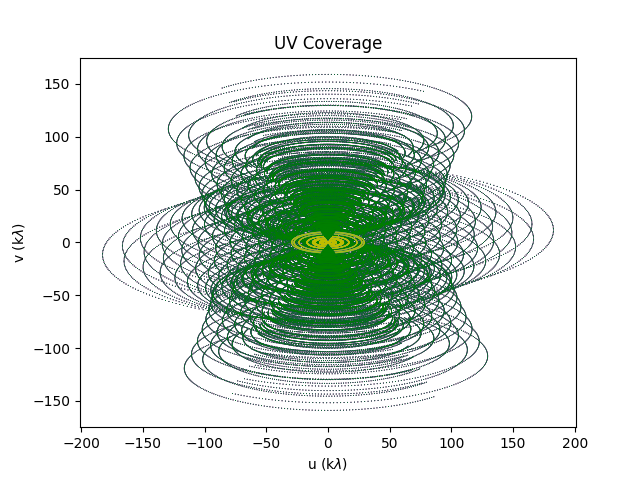

In [49]:
start_obs_run = requests.get(f'{host}/observe/{obs_id}/start/uv_cov')
uv_cov_image = start_obs_run.content
Image(uv_cov_image)

In [50]:
with open('toObserve.png', 'rb') as f:
    final_obs_run = requests.post(f'{host}/observe/{obs_id}/start/image', data=f)
final_image = final_obs_run.json()
final_image
# Image(final_image)

{'fft_cov': 'iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAYAAAA10dzkAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAEAAElEQVR4nOz9eXxd9X3njz/fZ7u7rnRlWZItW0aOQKDg2GAWs4QlOBAIJARICWn2pGmWdtLmO9NfO/Pt9NdZMp0u6bSZtJNpkzQLhRAIYQuJCYZAMDYYuwYbgWNh2bK1X+nq7ueec97fPz4Xdegy0yYzTTM+z8dDD/C9R7rnbufz/rzf79frLaqqxMTExMTExMTEnDJYP+0TiImJiYmJiYmJ+aclDgBjYmJiYmJiYk4x4gAwJiYmJiYmJuYUIw4AY2JiYmJiYmJOMeIAMCYmJiYmJibmFCMOAGNiYmJiYmJiTjHiADAmJiYmJiYm5hQjDgBjYmJiYmJiYk4x4gAwJiYmJiYmJuYUIw4AY2JiYmJiYmJOMeIAMCYmJiYmJibmFCMOAGNiYmJiYmJiTjHiADAmJiYmJiYm5hQjDgBjYmJiYmJiYk4x4gAwJiYmJiYmJuYUIw4AY2JiYmJiYmJOMeIAMCYmJiYmJibmFCMOAGNiYmJiYmJiTjHiADAmJiYmJiYm5hQjDgBjYmJiYmJiYk4x4gAwJiYmJiYmJuYUIw4AY2JiYmJiYmJOMeIAMCYmJiYmJibmFCMOAGNiYmJiYmJiTjHiADAmJiYmJiYm5hQjDgBjYmJiYmJiYk4x4gAwJiYmJiYmJuYUIw4AY2JiYmJiYmJOMeIAMCYmJiYmJibmFCMOAGNiYmJiYmJiTjHiADAmJiYmJiYm5hQjDgBjYmJiYmJiYk4x4gAwJiYmJiYmJuYUIw4AY2JiYmJiYmJOMeIAMCYm5pRDRPit3/qtf/TvHT16FBHhy1/+8v/2c4qJiYn5pyQ

In [38]:
print(final_image['fft_cov'] == final_image['uv_cov'])

False


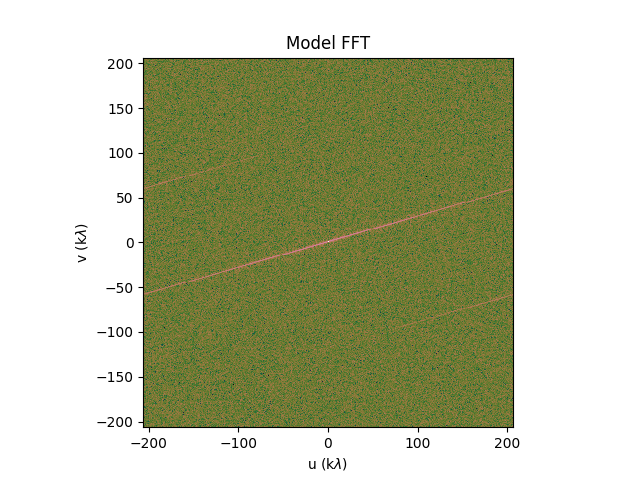

In [51]:
Image(base64.b64decode(final_image['fft_cov']))

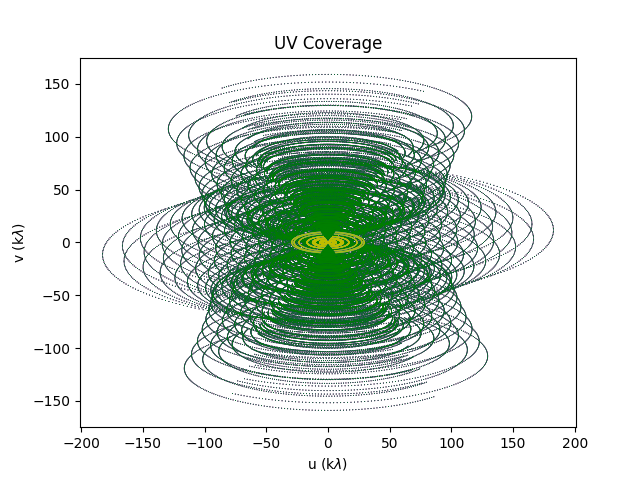

In [52]:
Image(base64.b64decode(final_image['uv_cov']))

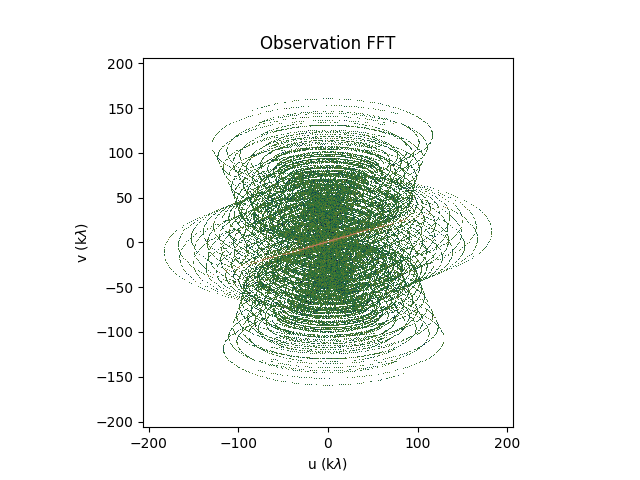

In [53]:
Image(base64.b64decode(final_image['obs_fft_cov']))

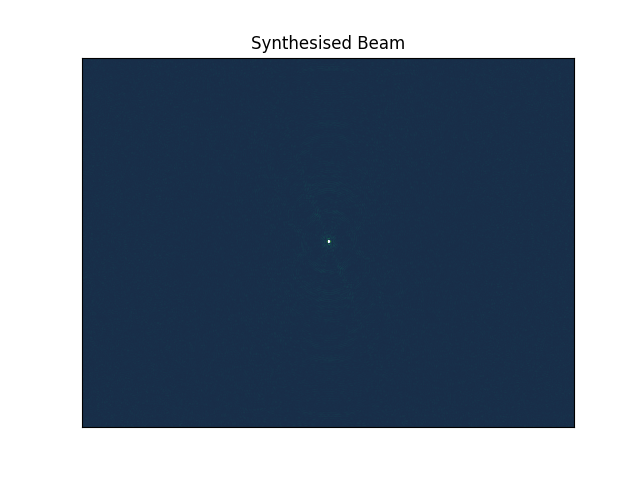

In [54]:
Image(base64.b64decode(final_image['synth_beam']))

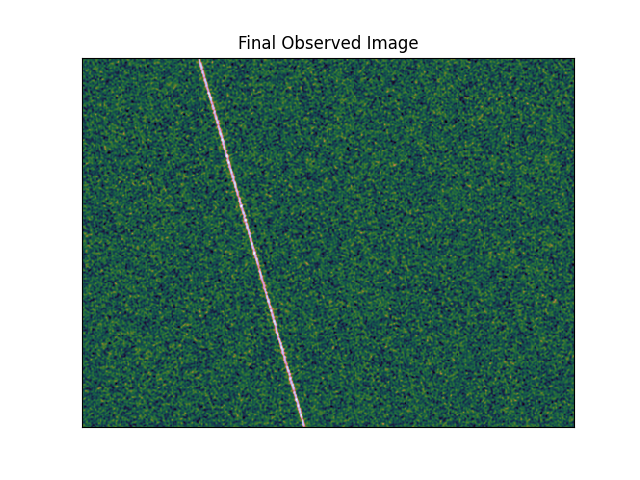

In [55]:
Image(base64.b64decode(final_image['final_img']))

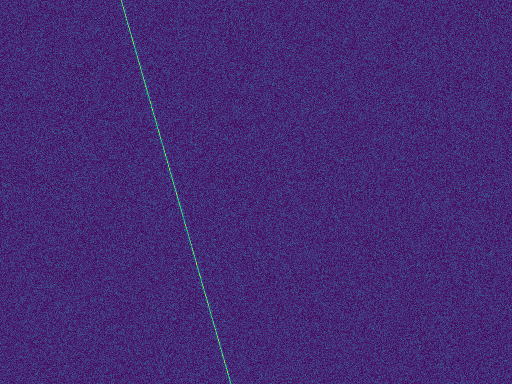

In [56]:
with open('toObserve.png', 'rb') as f:
    final_obs_run = requests.post(f'{host}/observe/512/start/loadimage', data=f)
final_image = final_obs_run.json()
Image(base64.b64decode(final_image['image']))
# final_image